In [65]:
import astropy.time as time
import astropy.table as table

In [78]:
tbl = table.QTable.read('data/hat-p-20.fits')
dates = time.Time(tbl['BJD']-tbl['BJD'].min(),format='jd',scale='tdb')

In [79]:
print(dates)

[0.00000000e+00 5.82000008e-03 1.16099999e-02 1.74800004e-02
 2.32700002e-02 2.90999999e-02 3.48800002e-02 4.07600002e-02
 1.79086800e+01 1.79145000e+01 1.79202900e+01 1.79261700e+01
 1.79319600e+01 1.79377800e+01 1.79435700e+01 1.79494400e+01
 1.79552300e+01 1.79610500e+01 1.79668400e+01 1.79727200e+01
 4.78181800e+01 4.78240100e+01 4.78297900e+01 4.78356700e+01
 4.78414600e+01 4.78472800e+01 4.78530700e+01 4.78589500e+01
 7.56553700e+01 7.56612000e+01 7.56669800e+01 7.56728600e+01
 7.56786500e+01 7.56844700e+01 7.56902600e+01 7.56961300e+01
 8.16610500e+01 8.16668800e+01 8.16726700e+01 8.16785500e+01
 8.16843300e+01 8.16901600e+01 8.16959500e+01 8.17018200e+01
 1.02672960e+02 1.02678790e+02 1.02684580e+02 1.02690460e+02
 1.02696240e+02 1.02702070e+02 1.02707850e+02 1.02713730e+02
 1.10702080e+02 1.10707910e+02 1.10713700e+02 1.10719570e+02
 1.10725360e+02 1.10731180e+02 1.10736970e+02 1.10742850e+02]


In [84]:
model_name = 'models/modeln7000_l0_r6000_mI32f_rd2_mI8.pt'
import model as wobble_model
model = wobble_model.load_model(model_name)

In [85]:
shifts = model.params[-model.epoches:]

In [86]:
import numpy as np
import astropy.constants as const
def velocityfromshift(shifts):
    expon = np.exp(2*shifts)
    vel = const.c * (expon-1)/(1 + expon)
    return vel
velocities = velocityfromshift(shifts)

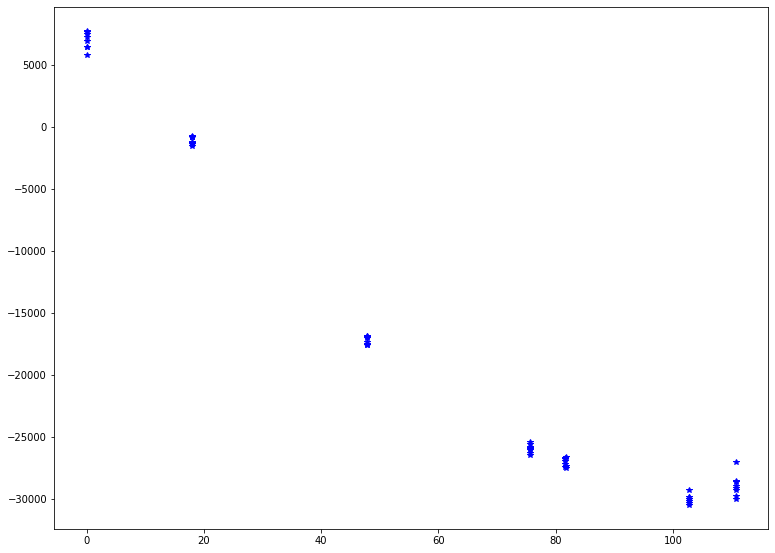

In [87]:
import matplotlib.pyplot as plt
import astropy.units as u
# print(dates.shape,velocities.shape)
# print(velocities.value)
plt.figure(figsize=[12.8,9.6])
plt.plot(dates.value,velocities.value,'*b')

In [88]:
import astropy.coordinates as coord
hatp20_c = coord.SkyCoord.from_name('HAT-P-20')
loc      = coord.EarthLocation.of_site('APO')
ts       = time.Time(tbl['BJD'], format='jd', scale='tdb')
bc       = hatp20_c.radial_velocity_correction(obstime=ts, location=loc).to(u.m/u.s)

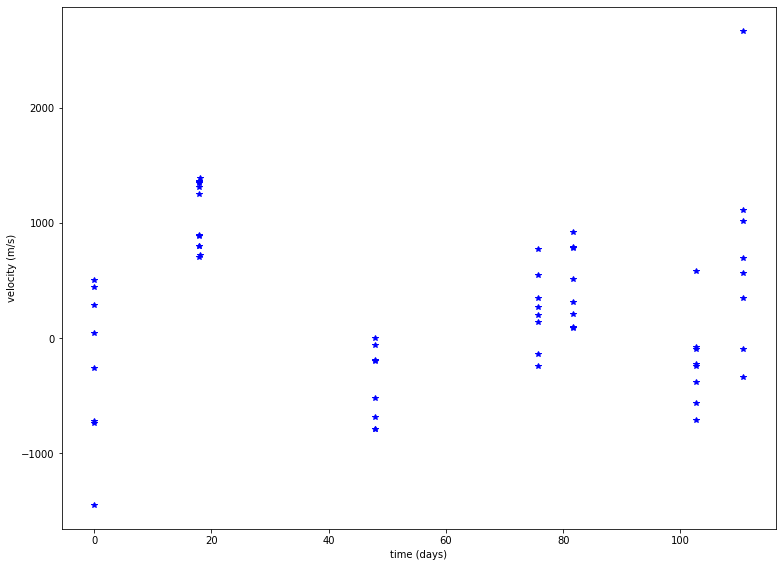

In [89]:
import os.path as path
model_tail = path.split(model_name)[1][:-3]
plt.figure(figsize=[12.8,9.6])
plt.plot(dates.value,velocities.value - bc.value,'*b')
plt.xlabel('time (days)')
plt.ylabel('velocity (m/s)')
plt.savefig('out/datesvels_corr_{}.png'.format(model_tail))

In [96]:
time_space  = time.Time(np.linspace(tbl['BJD'].min(),tbl['BJD'].max(),10000),format='jd',scale='tdb')
corrections = hatp20_c.radial_velocity_correction(obstime=time_space, location=loc).to(u.m/u.s)
print(corrections[0:10])

[7255.26435741 7227.94900571 7201.54576113 7176.15547791 7151.87407766
 7128.79197629 7106.99391089 7086.55832358 7067.55695573 7050.05456108] m / s


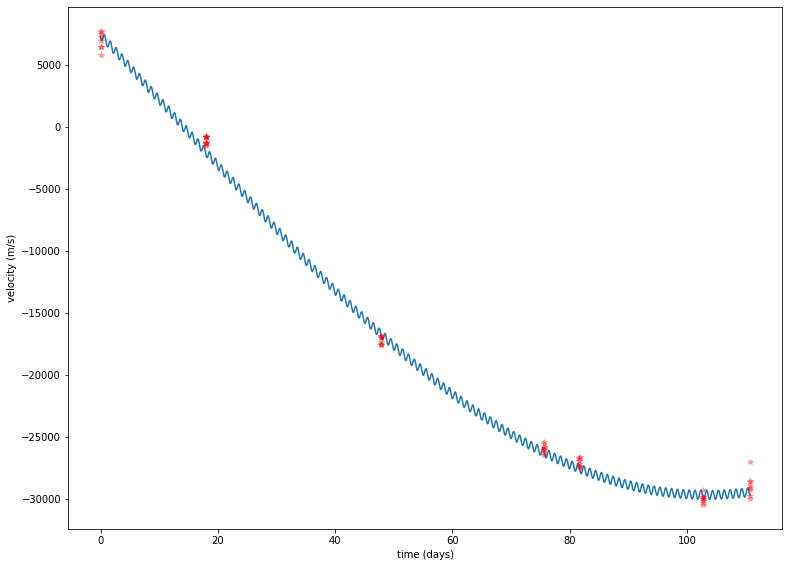

In [95]:
plt.figure(figsize=[12.8,9.6])
plt.plot(time_space.value - time_space.min().value,corrections.value)
plt.plot(dates.value,velocities.value,'r*',alpha=0.3)
plt.xlabel('time (days)')
plt.ylabel('velocity (m/s)')
plt.savefig('out/tsbc_datesvels_{}'.format(model_tail))

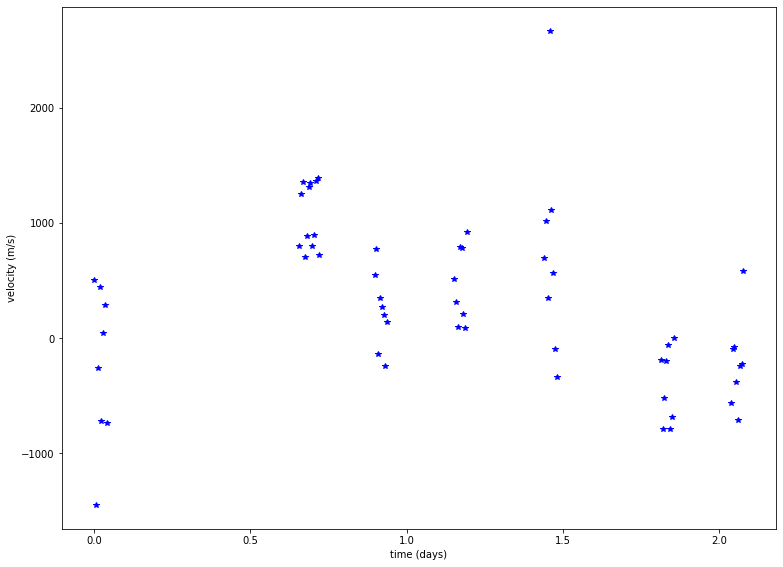

In [92]:
period= 2.8753172
plt.figure(figsize=[12.8,9.6])
plt.plot(dates.value % period,velocities.value - bc.value,'*b')
plt.xlabel('time (days)')
plt.ylabel('velocity (m/s)')
plt.savefig('out/datesvels_corr_mod_{}'.format(model_tail))

ValueError: x and y must have same first dimension, but have shapes (7000,) and (7060,)

<Figure size 921.6x691.2 with 0 Axes>

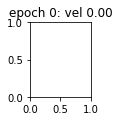

In [93]:
plt.figure(figsize=[12.8,9.6])
model.plot(xlim=[9.645,9.645])